In [1]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines
from dataloader.eda import DataExplorer

%load_ext autoreload
%autoreload 2

##### Load data and initialize `MLPipelines` 

In [2]:
csv_dir = "../data/ST000369.csv"
label = "Class"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 0.0, 1: 1.0}
There is no selected classifier.
Number of rows: 80 
Number of columns: 182


##### Perform Data Exploration using `DataExplorer` 

Label mapping: {0: 0.0, 1: 1.0}
Normalization completed.


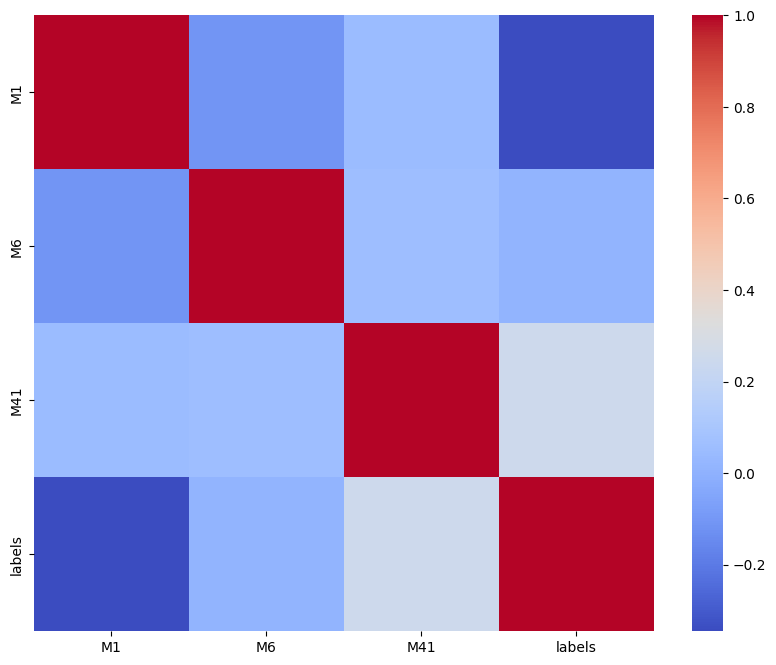

array([[ 1.        , -0.11384608,  0.0482537 , -0.34535023],
       [-0.11384608,  1.        ,  0.05707709,  0.00696143],
       [ 0.0482537 ,  0.05707709,  1.        ,  0.24891133],
       [-0.34535023,  0.00696143,  0.24891133,  1.        ]])

In [7]:
explorer = DataExplorer(csv_dir=csv_dir, label=label)
explorer.correlations(get_table=True, list_of_feature=['M1', 'M6', 'M41'])

##### Perform model selection using **Nested Cross Validation**

Your Dataset contains NaN values. Some estimators may not work with NaN values.


Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:05 ETA:   0:00:11
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:11 ETA:   0:00:05
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:12 Time:  0:00:12


Finished with 1 round after 0.01 hours.
Finished with 6 estimators


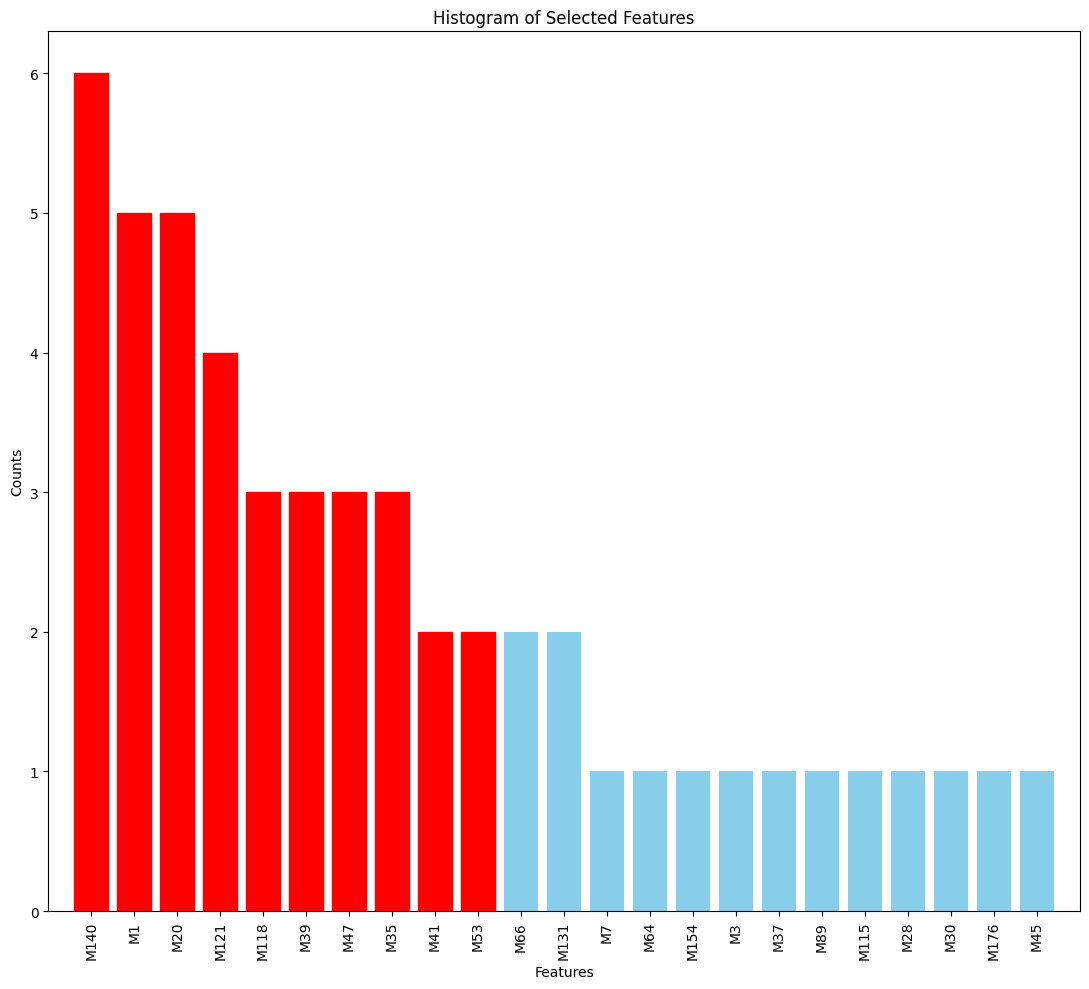

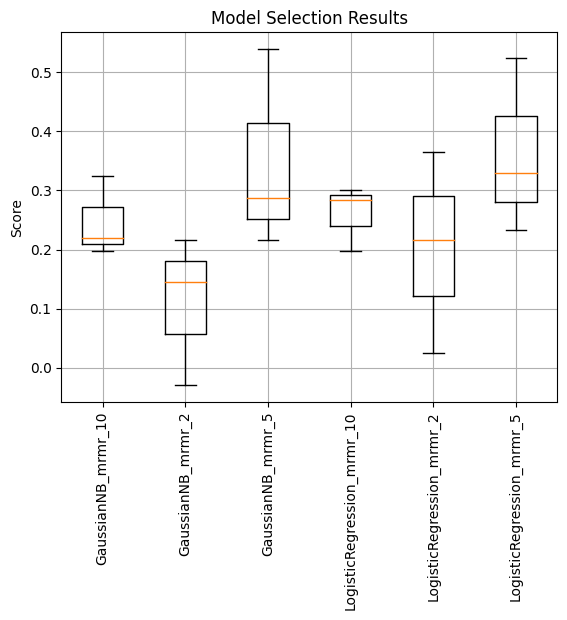

In [8]:
scores, features_list, all_featues = mlpipe.nested_cv(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

In [3]:
mlpipe.normalize()

Converting the raw data with minmax normalization method....
Normalization completed.


In [4]:
# autorealod    
%autoreload 2
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3],
    'learning_rate': [0.1, 0.01]
}

print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=XGBClassifier(), parameter_grid=param_grid)

# print()

# print('Training with GridSearchCV:')
# mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

Training with RandomizedSearchCV:
Best parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Best matthews_corrcoef: 0.20789661557368405


In [26]:
mlpipe.bootstrap_validation(n_iter=10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.54it/s]


[0.14907119849998599,
 0.034815531191139566,
 0.16265001215808886,
 -0.3333333333333333,
 -0.4472135954999579,
 -0.2,
 -0.06666666666666667,
 -0.3333333333333333,
 0.09759000729485331,
 0.0]

In [13]:
mlpipe.bayesian_search(n_trials=3)

  0%|          | 0/3 [00:00<?, ?it/s]

Best parameters: {'learning_rate': 0.16277061433455875, 'n_estimators': 416, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 2.7630238849051376, 'subsample': 0.7850648722441137, 'colsample_bytree': 0.627331621438142, 'reg_alpha': 0.6405916413398809, 'reg_lambda': 0.8416209008277818, 'scale_pos_weight': 40.02915074604656, 'booster': 'dart', 'tree_method': 'hist'}
Best matthews_corrcoef: 0.1266318182776335
